## Decision Tree 

In [1]:
# Importing Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

In [2]:
# reading Data set
df = pd.read_csv('heart_v2.csv')
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [3]:
# checking columns
df.columns

Index(['age', 'sex', 'BP', 'cholestrol', 'heart disease'], dtype='object')

In [4]:
# checking info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [5]:
# stats
df.describe()

,age,sex,BP,cholestrol,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,131.344444,249.659259,0.444444
std,9.109067,0.468195,17.861608,51.686237,0.497827
min,29.000000,0.000000,94.000000,126.000000,0.000000
25%,48.000000,0.000000,120.000000,213.000000,0.000000
50%,55.000000,1.000000,130.000000,245.000000,0.000000
75%,61.000000,1.000000,140.000000,280.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000


In [6]:
df['heart disease'].value_counts()

0    150
1    120
Name: heart disease, dtype: int64

In [7]:
# assigning X and y varibale as X as feature and y as feature variable
X = df.drop('heart disease', axis =1)
y = df['heart disease'].copy()

In [8]:
X.head()

,age,sex,BP,cholestrol
0,70,1,130,322
1,67,0,115,564
2,57,1,124,261
3,64,1,128,263
4,74,0,120,269


In [9]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: heart disease, dtype: int64

## Train Test Split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=42)

In [12]:
X_train.shape, X_test.shape

((189, 4), (81, 4))

Fitting the decision tree with default hyperparameters, apart from max_depth which is 3 so that we can plot and read the tree.

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [15]:
# Importing required packages for visulization
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

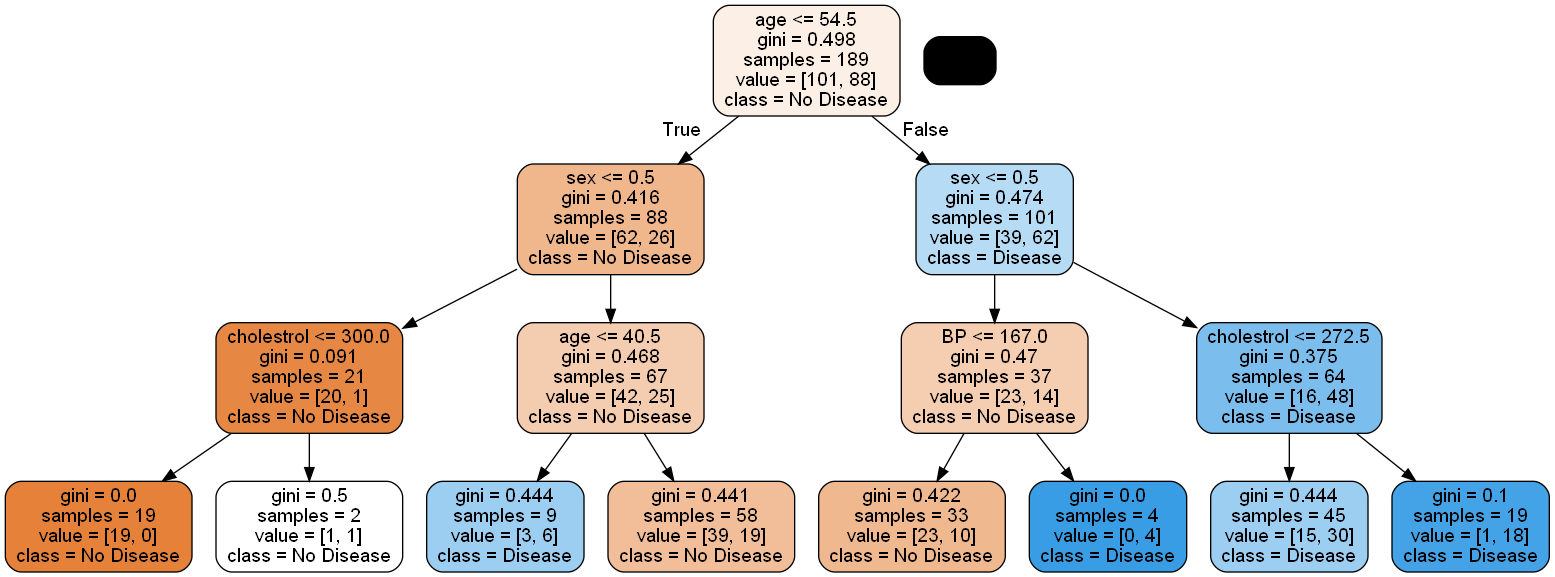

In [16]:
# plotting tree with max_depth=3dot_data = StringIO()  
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['No Disease', "Disease"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
#Image(graph.create_png(),width=800,height=900)
#graph.write_pdf("dt_heartdisease.pdf")

### Alternative method for Graphviz

from sklearn.tree import plot_tree
plt.figure(figsize=(60,30))
plot_tree(dt, feature_names = X.columns,class_names=['No Disease', "Disease"],filled=True);

In [17]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [19]:
accuracy_score(y_train, y_train_pred)

0.7407407407407407

In [20]:
confusion_matrix(y_train, y_train_pred)

array([[82, 19],
       [30, 58]], dtype=int64)

In [21]:
print('Accuracy score for Test set')
accuracy_score(y_test, y_test_pred)

Accuracy score for Test set


0.6049382716049383

Creating helper function to evaluate model performance and help plot Decision Tree

In [22]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO() 
    export_graphviz(dt_classifier, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['No Disease', "Disease"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
     
    return graph

In [23]:
def Evaluate_model(dt_classifier):

    print("for train set")
    print(accuracy_score(y_train, dt_classifier.predict(X_train)))
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("_"* 50)
    print("for test set")
    print(accuracy_score(y_test, dt_classifier.predict(X_test)))
    print(confusion_matrix(y_test,dt_classifier.predict(X_test)))

In [24]:
Evaluate_model(dt)

for train set
0.7407407407407407
[[82 19]
 [30 58]]
__________________________________________________
for test set
0.6049382716049383
[[35 14]
 [18 14]]


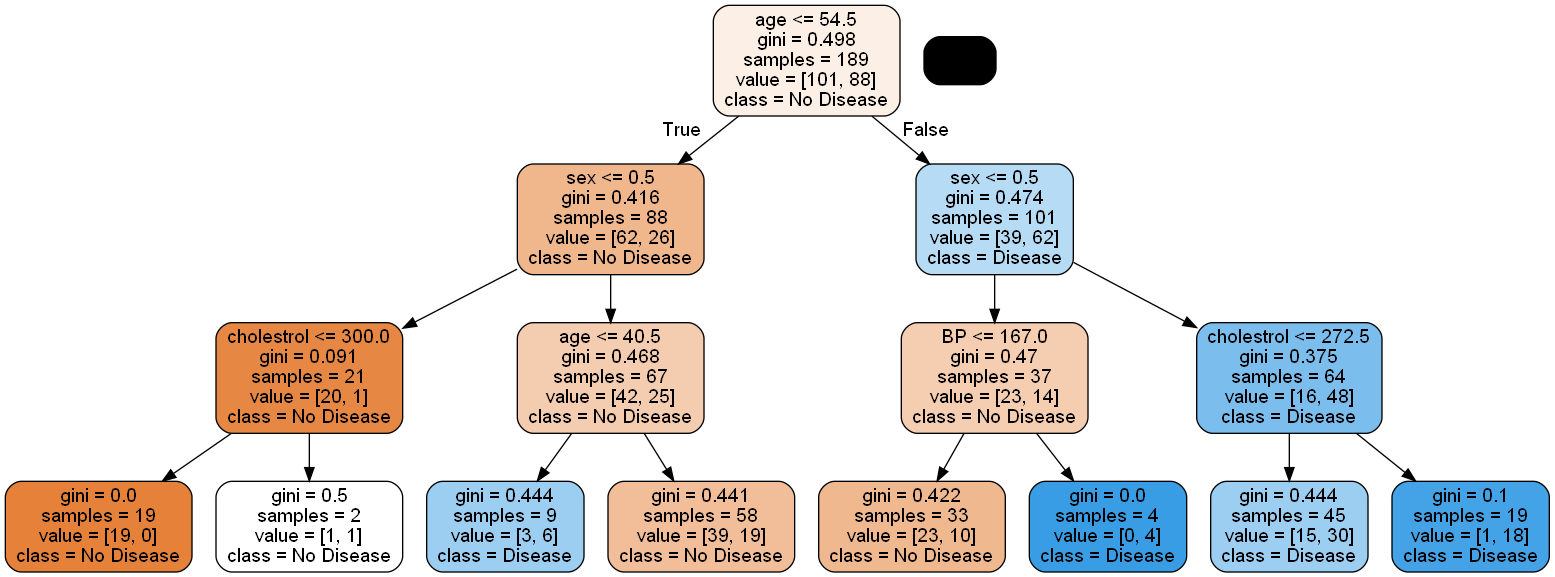

In [25]:
gph = get_dt_graph(dt)
Image(gph.create_png())

## Decision Tree without any hyper-parameter settings

In [26]:
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

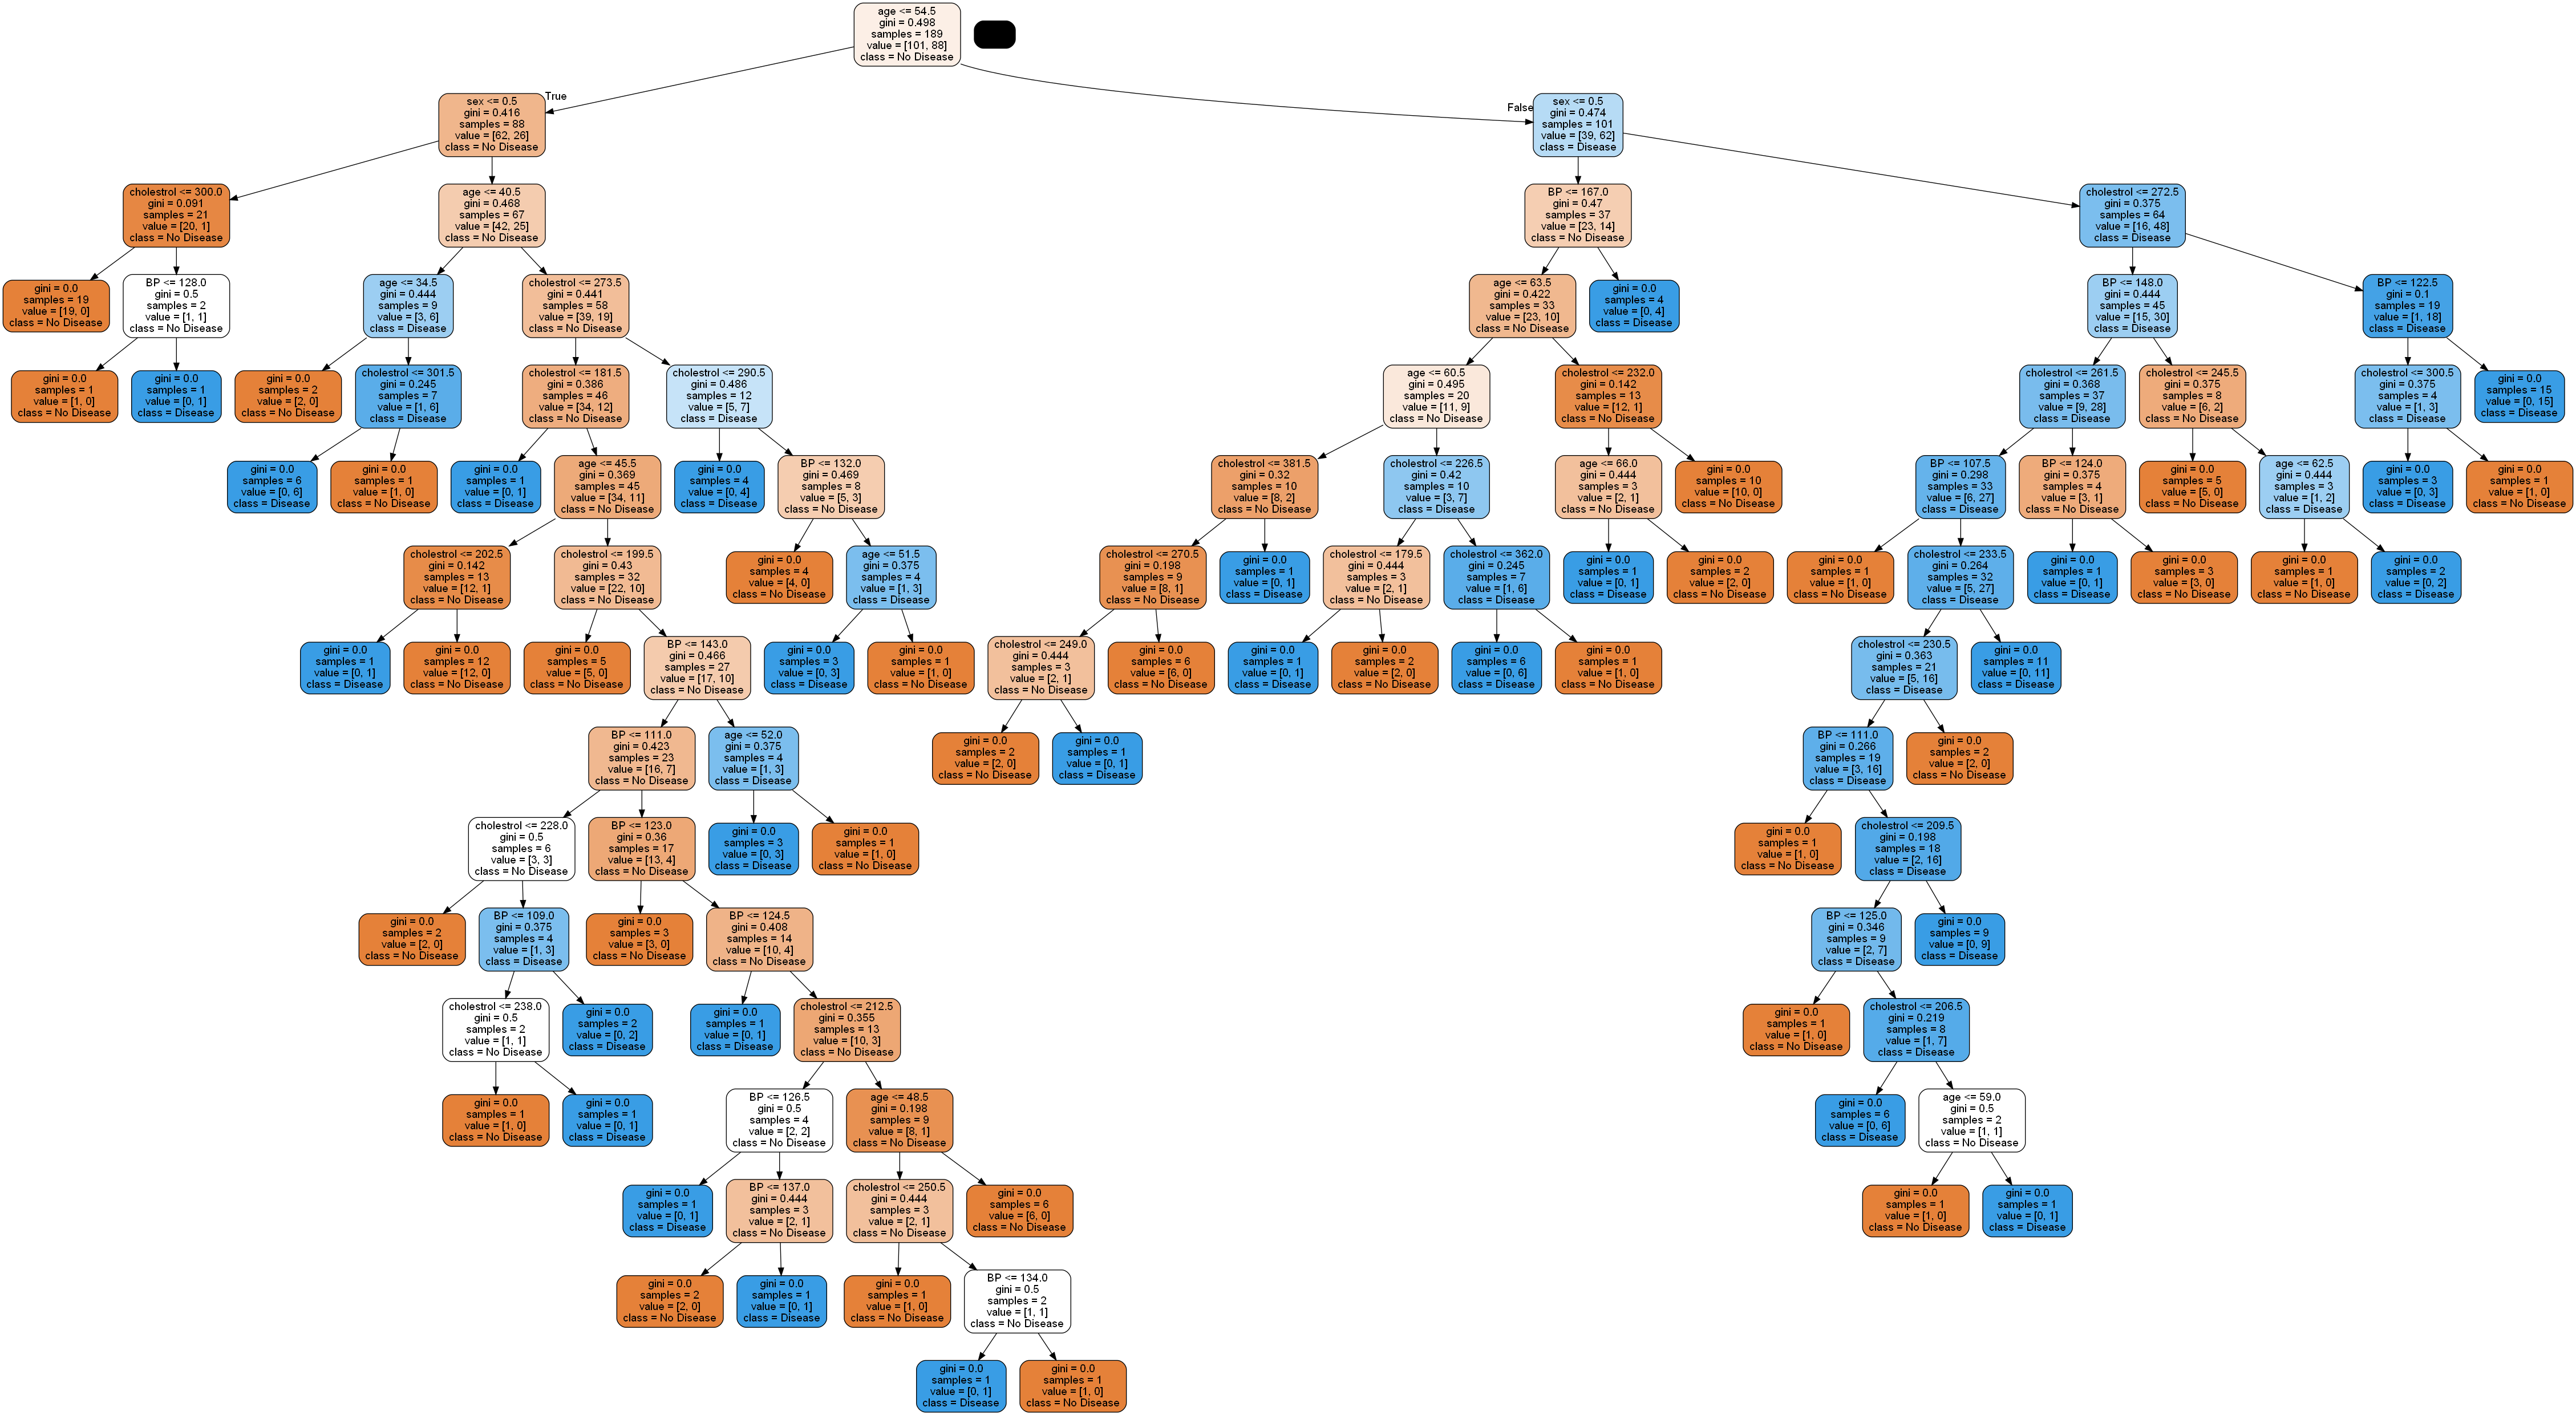

In [27]:
gph = get_dt_graph(dt_default)
Image(gph.create_png())

In [28]:
Evaluate_model(dt_default)

for train set
1.0
[[101   0]
 [  0  88]]
__________________________________________________
for test set
0.6296296296296297
[[31 18]
 [12 20]]


## Controlling depth of Tree

In [29]:
dt_depth = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_depth.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

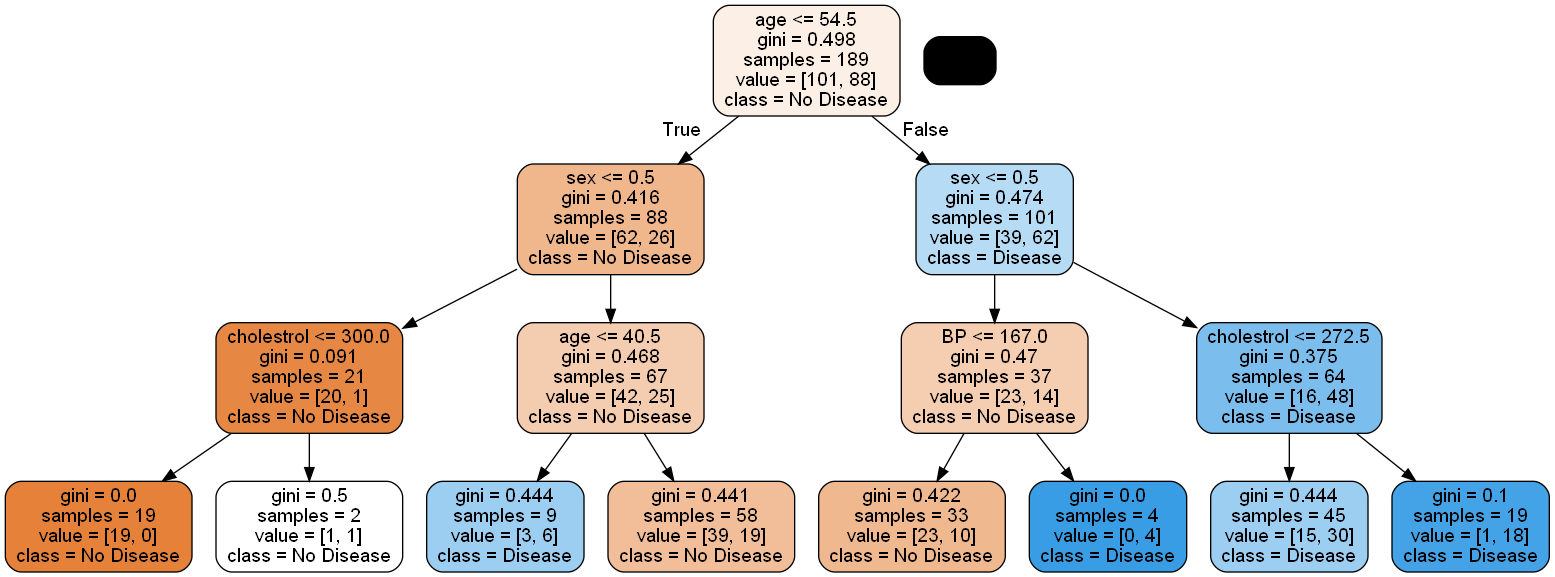

In [30]:
gph= get_dt_graph(dt_depth)
Image(gph.create_png())

In [31]:
Evaluate_model(dt_depth)

for train set
0.7407407407407407
[[82 19]
 [30 58]]
__________________________________________________
for test set
0.6049382716049383
[[35 14]
 [18 14]]


In [32]:
#other hyper-parameter
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best ran

## Specifying minimum sample before split

In [33]:
dt_min_split= DecisionTreeClassifier(min_samples_split=20, random_state=42)
dt_min_split.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=20, random_state=42)

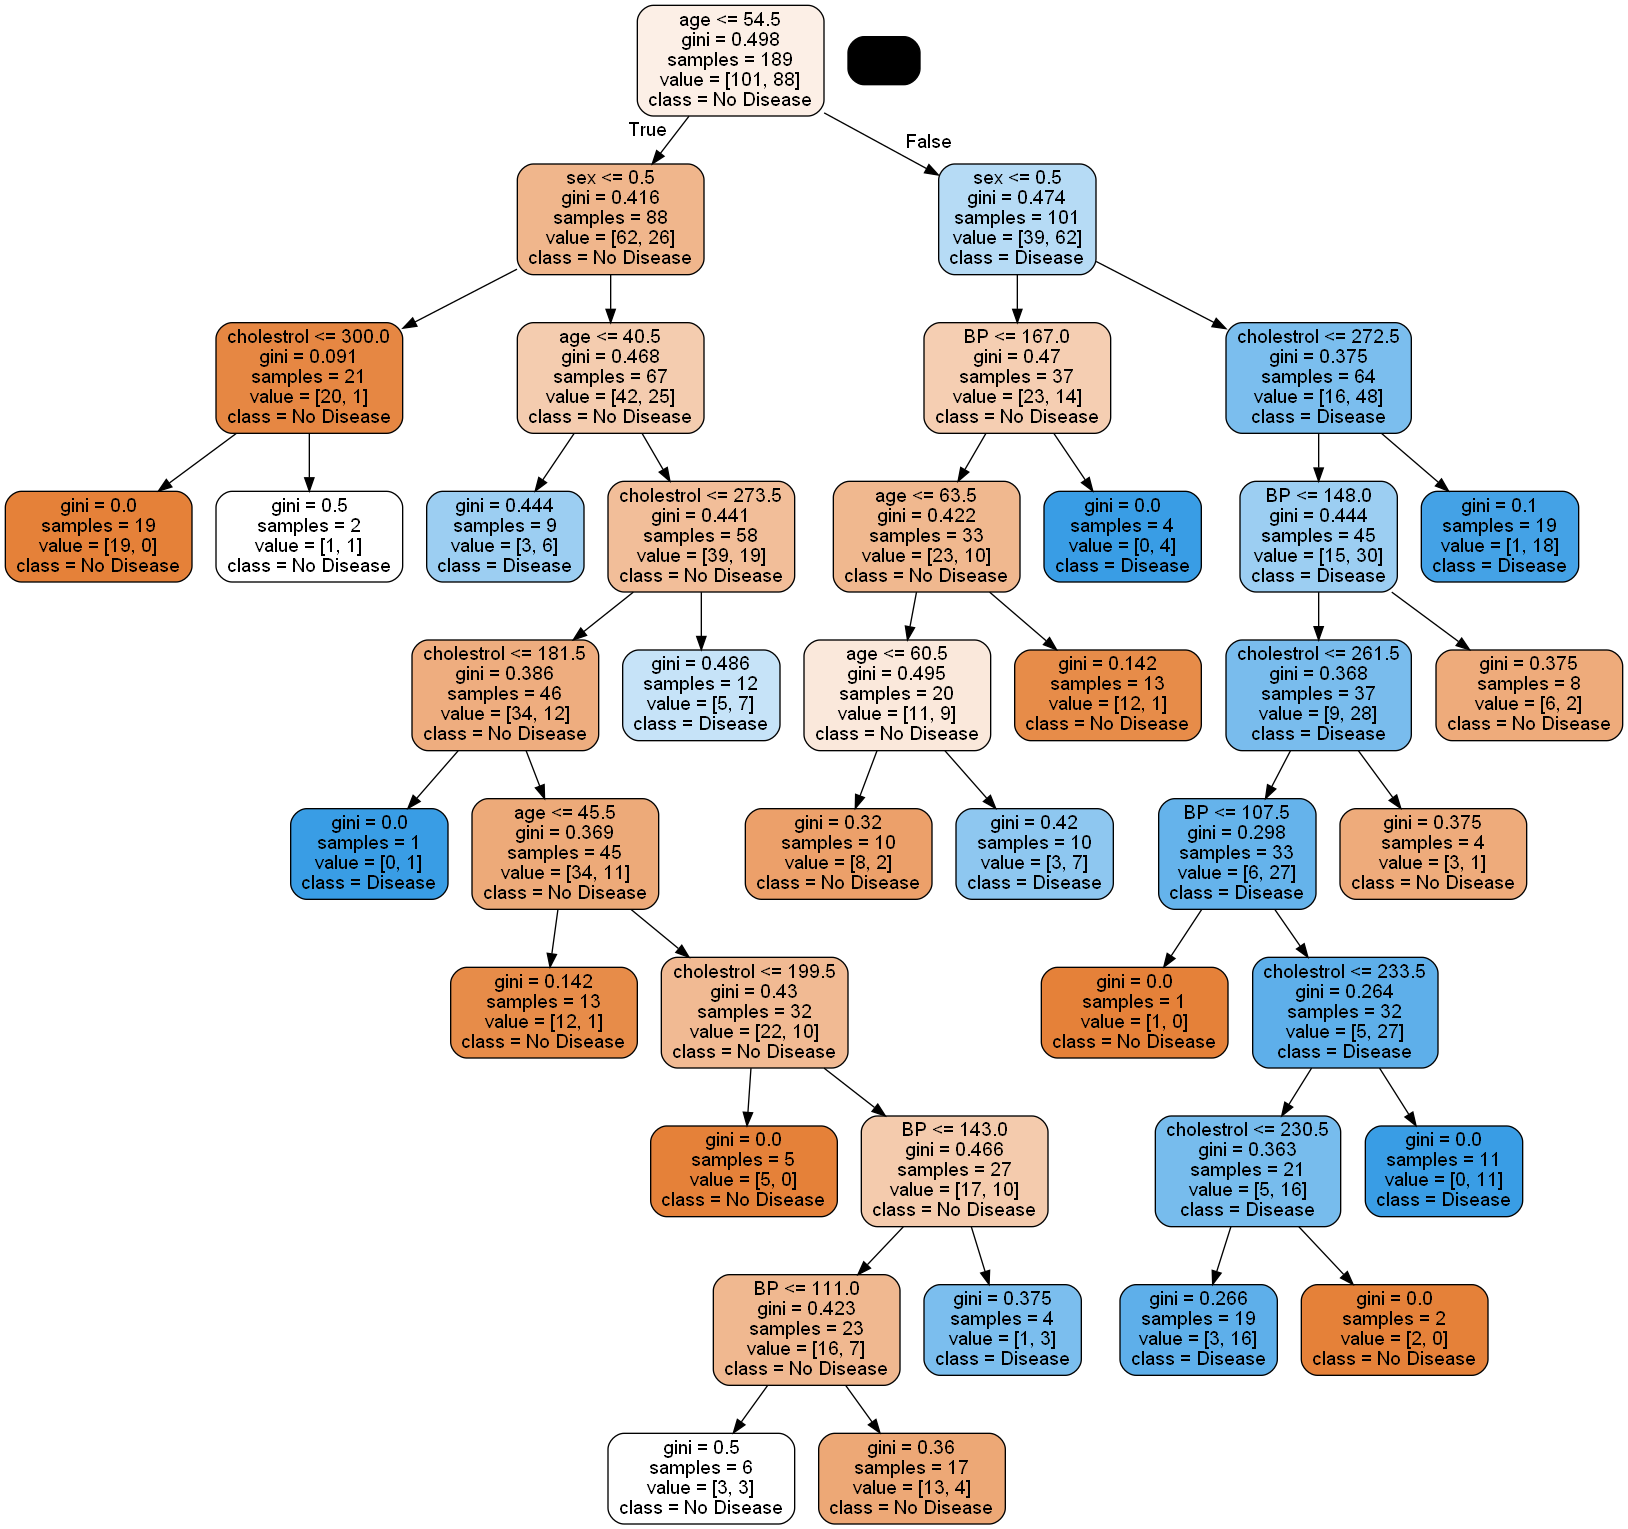

In [34]:
gph = get_dt_graph(dt_min_split)
Image(gph.create_png())

In [35]:
Evaluate_model(dt_min_split)

for train set
0.8359788359788359
[[85 16]
 [15 73]]
__________________________________________________
for test set
0.6419753086419753
[[32 17]
 [12 20]]


## Specifying minimum samples in leaf node

In [36]:
dt_min_leaf = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
dt_min_leaf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

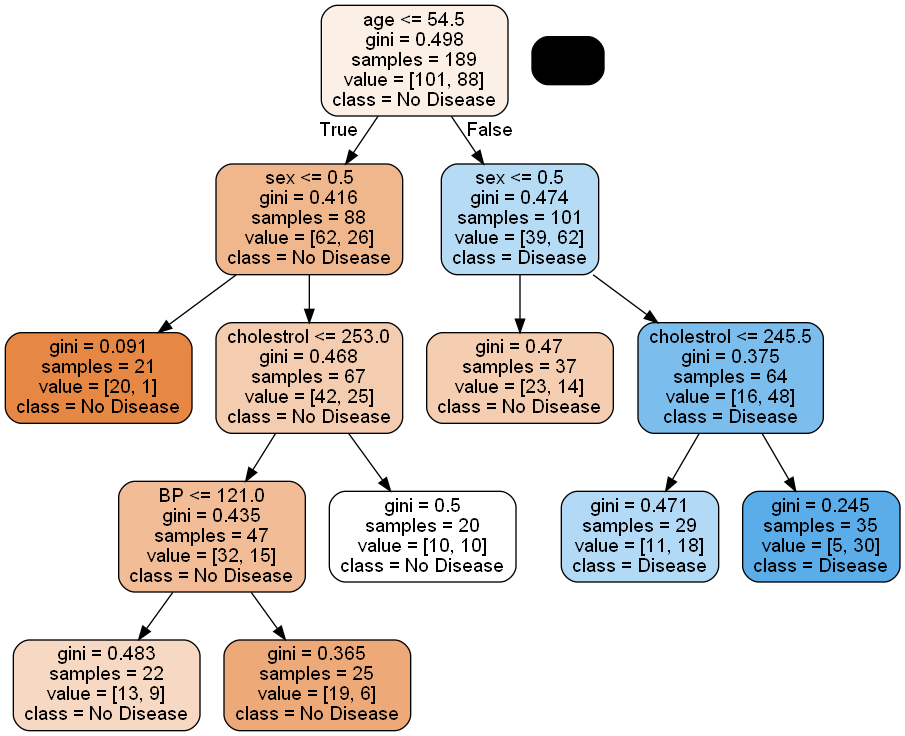

In [37]:
gph= get_dt_graph(dt_min_leaf)
Image(gph.create_png())

In [38]:
Evaluate_model(dt_min_leaf)

for train set
0.7037037037037037
[[85 16]
 [40 48]]
__________________________________________________
for test set
0.6419753086419753
[[38 11]
 [18 14]]


## Using Entropy Insted of gini

In [39]:
dt_min_leaf_entropy = DecisionTreeClassifier(min_samples_leaf=20, random_state=42, criterion='entropy')
dt_min_leaf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20,
                       random_state=42)

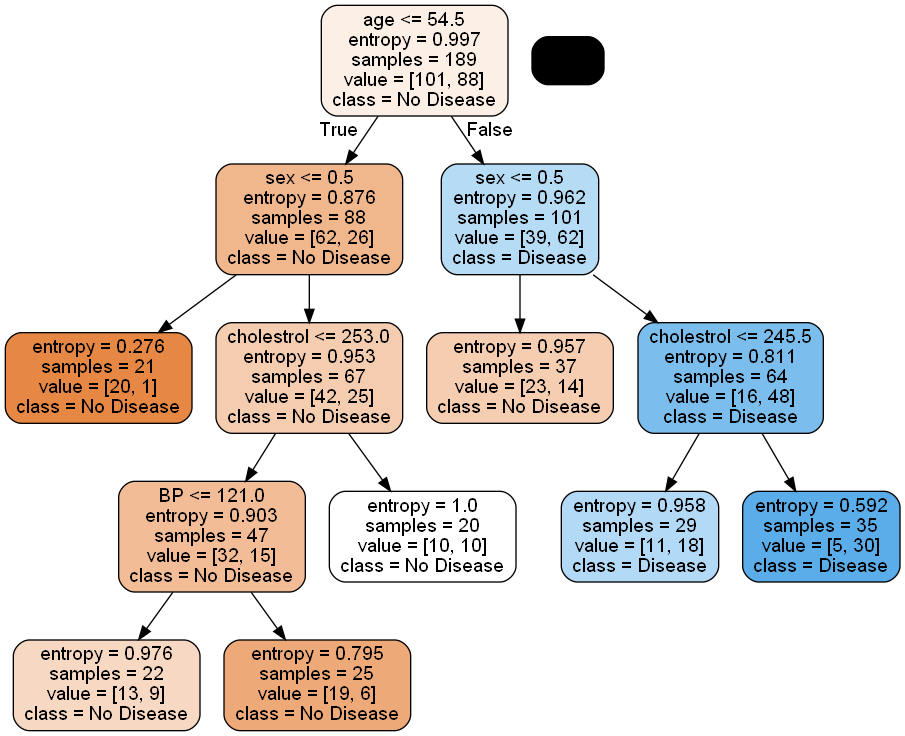

In [40]:
gph = get_dt_graph(dt_min_leaf_entropy)
Image(gph.create_png())

In [41]:
Evaluate_model(dt_min_leaf_entropy)

for train set
0.7037037037037037
[[85 16]
 [40 48]]
__________________________________________________
for test set
0.6419753086419753
[[38 11]
 [18 14]]


## Hyper-Parameter Tunning

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
dt = DecisionTreeClassifier(random_state=42)

In [45]:
# Creating the parameter grid based on the results of random search
params = { 'max_depth':[2,3,5,10,20],
          'min_samples_leaf':[5,10,20,50,100],
          'criterion':["gini","entropy"]
}

In [46]:
# Instantiate grid search model
grid_search = GridSearchCV(estimator=dt,
             param_grid=params,
             cv=4, n_jobs=-1, verbose=1, scoring = 'accuracy'
            )

In [47]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
Wall time: 6.83 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [48]:
cv_df = pd.DataFrame(grid_search.cv_results_)
cv_df.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000000,0.000000,0.010532,0.006454,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.708333,0.744681,0.617021,0.531915,0.650488,0.082762,17
1,0.003130,0.005421,0.007904,0.007905,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.708333,0.744681,0.617021,0.531915,0.650488,0.082762,17
2,0.003117,0.002806,0.005328,0.006250,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.687500,0.744681,0.617021,0.531915,0.645279,0.079551,20


In [49]:
cv_df.shape

(50, 15)

In [50]:
cv_df.nlargest(5, 'mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
30,0.003799,0.000682,0.001733,0.001087,entropy,3,5,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.604167,0.765957,0.617021,0.680851,0.666999,0.064090,1
5,0.004009,0.005119,0.000000,0.000000,gini,3,5,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.625000,0.744681,0.595745,0.659574,0.656250,0.055831,2
3,0.007814,0.007814,0.003906,0.006766,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,3
8,0.009238,0.005456,0.004753,0.003957,gini,3,50,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,3
13,0.003291,0.000461,0.002540,0.000898,gini,5,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,3


In [51]:
grid_search.best_score_

0.6669991134751774

In [52]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=42)

In [53]:
dt_best = grid_search.best_estimator_

In [54]:
Evaluate_model(dt_best)

for train set
0.7195767195767195
[[82 19]
 [34 54]]
__________________________________________________
for test set
0.6172839506172839
[[36 13]
 [18 14]]


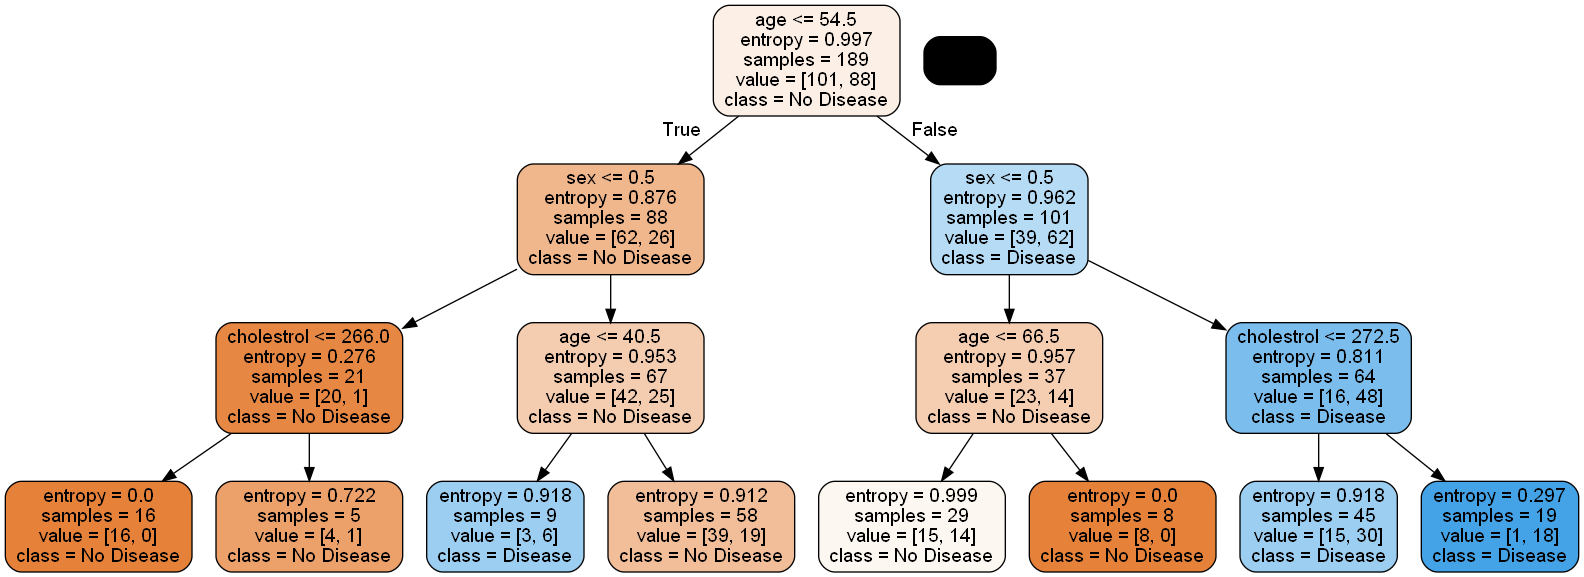

In [55]:
gph = get_dt_graph(dt_best)
Image(gph.create_png())

## Random Forest

In [56]:
# using random forests classifier
from sklearn.ensemble import RandomForestClassifier

In [57]:
X_train.head()

,age,sex,BP,cholestrol
84,57,1,110,201
251,44,1,130,219
92,54,1,124,266
201,58,1,125,300
126,62,1,120,267


In [58]:
y_train.head()

84     0
251    0
92     1
201    1
126    1
Name: heart disease, dtype: int64

In [59]:
rf = RandomForestClassifier(random_state= 42, max_depth = 3, n_estimators=10)

In [60]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=42)

In [61]:
rf.estimators_[0]

DecisionTreeClassifier(max_depth=3, max_features='auto',
                       random_state=1608637542)

In [62]:
sample_tree= rf.estimators_[4]

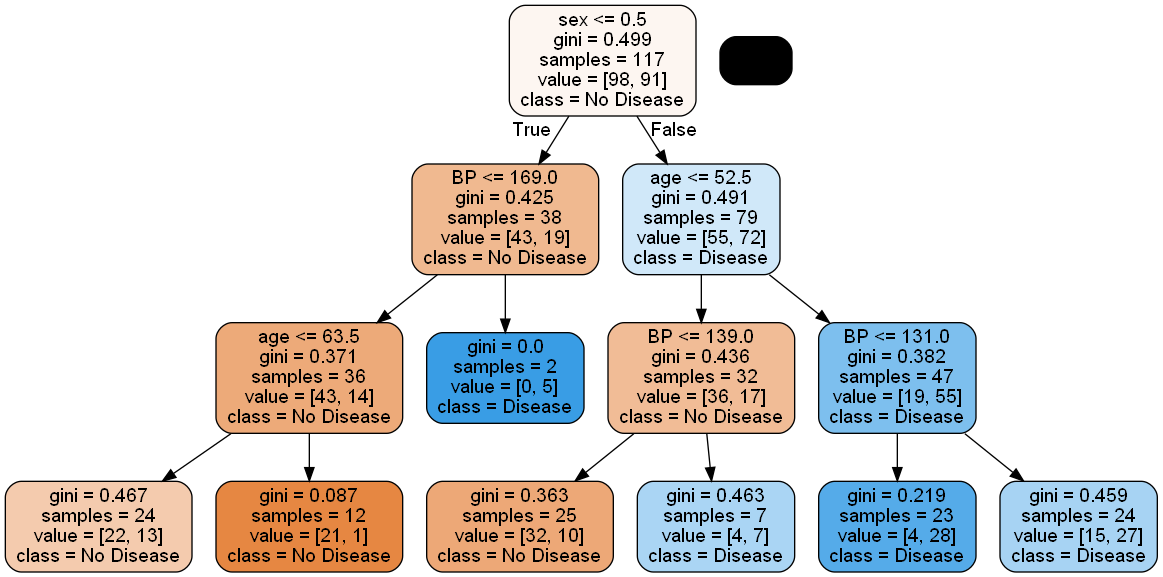

In [63]:
gph = get_dt_graph(sample_tree)
Image(gph.create_png())

In [64]:
sample_tree = rf.estimators_[2]

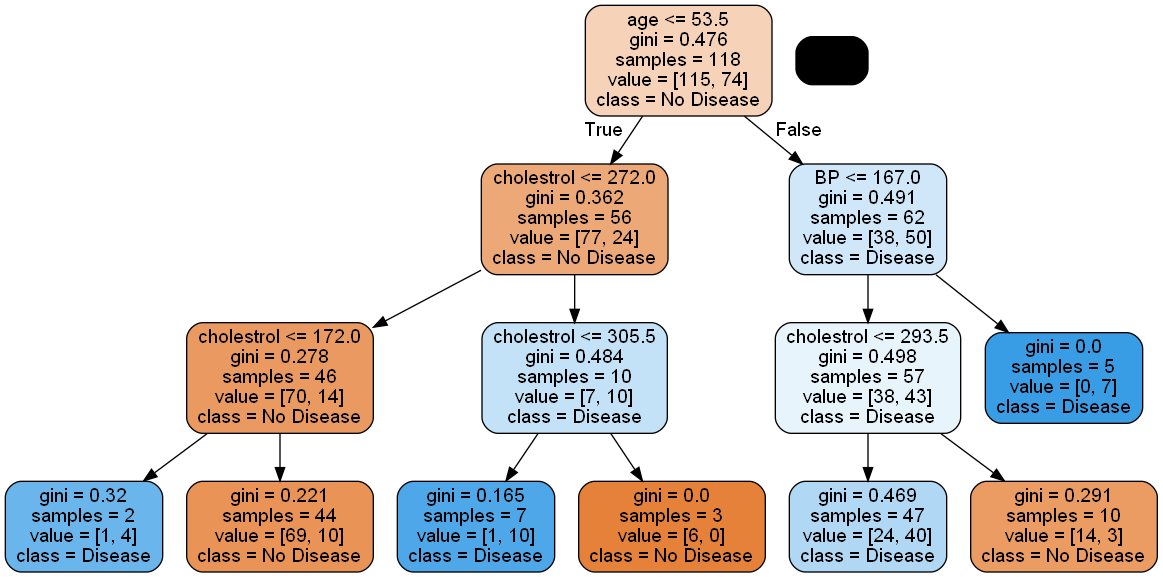

In [65]:
gph = get_dt_graph(sample_tree)
Image(gph.create_png())

## OOB Score

In [69]:
rf= RandomForestClassifier(random_state=42, max_depth=3, n_estimators=10, oob_score= True)
# obb is use to validate the rf, to check rf performance

In [70]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, oob_score=True,
                       random_state=42)

In [71]:
rf.oob_score_

0.6349206349206349

## GridSearch for Hyper_Paramete Tunning

In [80]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [81]:
# craete the parameter grid based on the results of random search
params = {
    'max_depth':[1,2,5,10, 20],
    'min_samples_leaf': [5,10,20,50,100],
    'max_features':[2,3,4],
    'n_estimators':[10,30,50,100,200]
}

In [82]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [84]:
%%time
grid_search.fit(X,y)

Fitting 4 folds for each of 375 candidates, totalling 1500 fits
Wall time: 59.3 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [92]:
rf_best = grid_search.best_estimator_

In [93]:
rf_best

RandomForestClassifier(max_depth=5, max_features=3, min_samples_leaf=5,
                       n_estimators=30, n_jobs=-1, random_state=42)

In [95]:
Evaluate_model(rf_best)

for train set
0.8042328042328042
[[87 14]
 [23 65]]
__________________________________________________
for test set
0.8024691358024691
[[42  7]
 [ 9 23]]


In [102]:
sample_tree= rf_best.estimators_[0]

In [103]:
sample_tree

DecisionTreeClassifier(max_depth=5, max_features=3, min_samples_leaf=5,
                       random_state=1608637542)

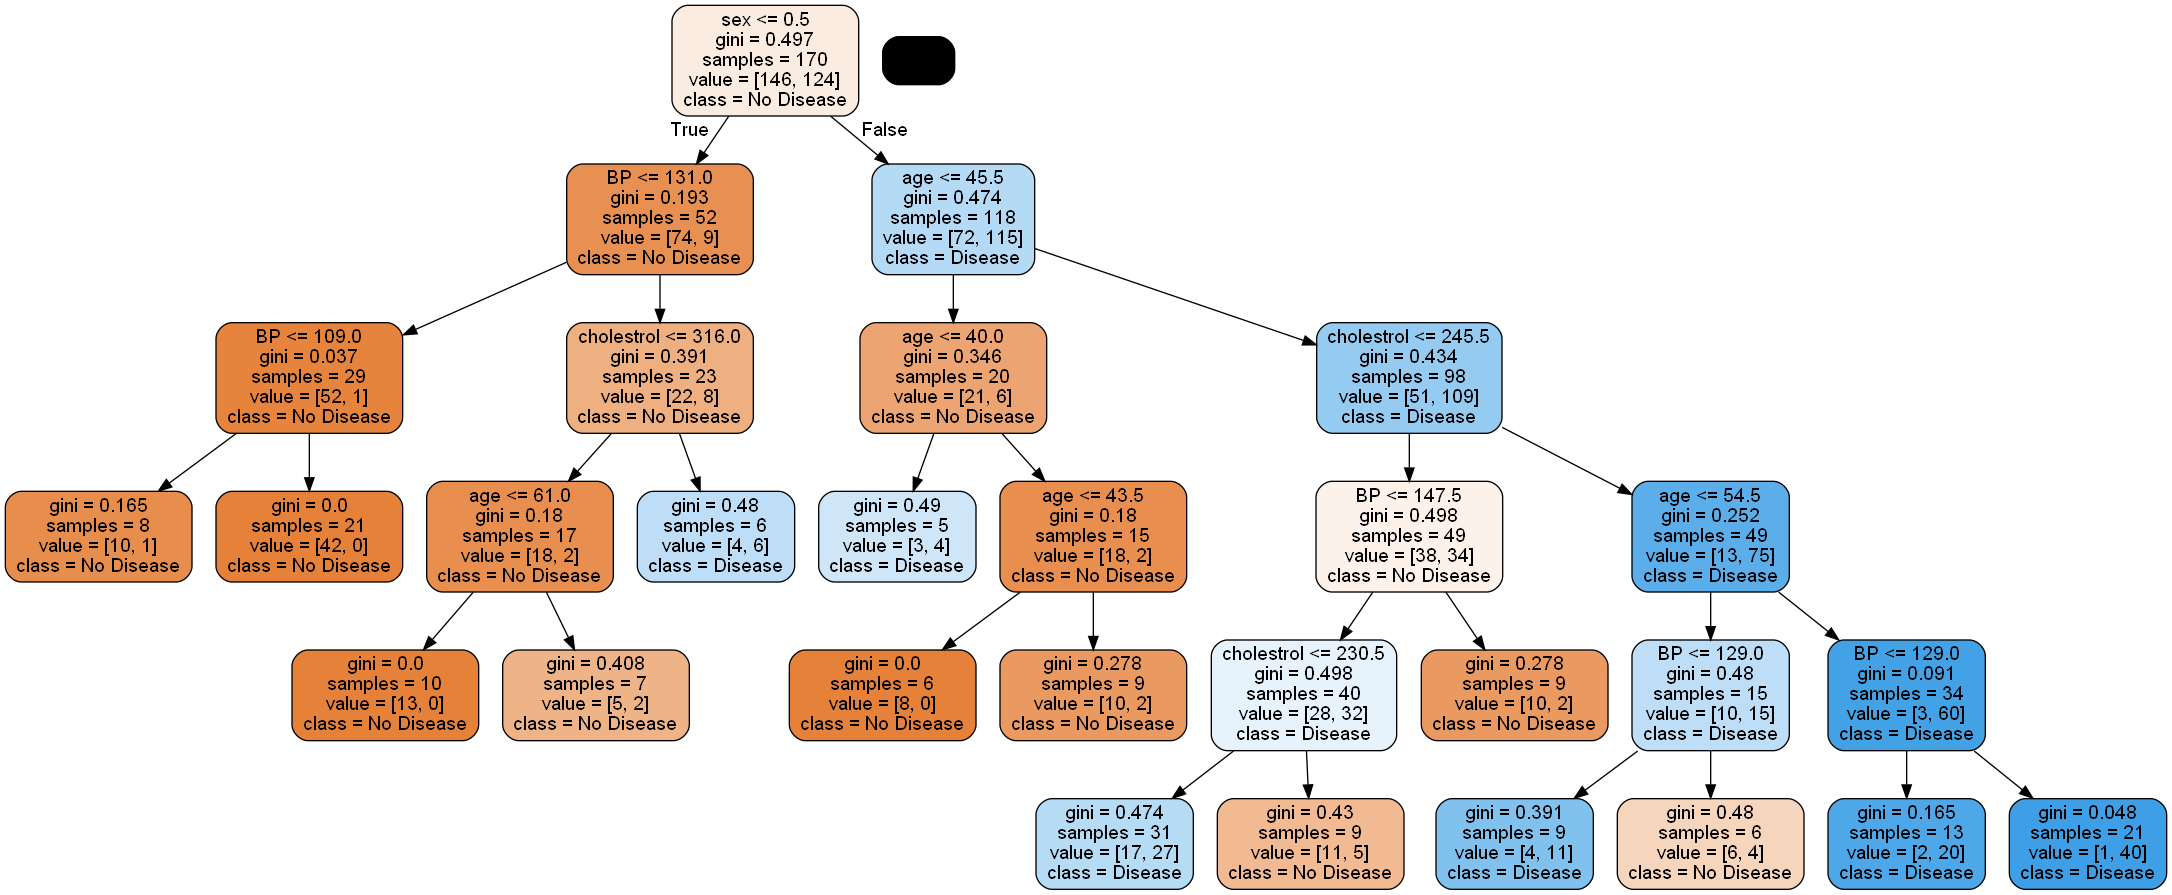

In [104]:
gph= get_dt_graph(sample_tree)
Image(gph.create_png())

## Variable Importance in Random Forest and Decision Tree

In [107]:
classifier_rf = RandomForestClassifier(random_state=42, max_depth=5,n_jobs=-1, n_estimators=100, oob_score=True)

In [108]:
classifier_rf.fit(X_train, y_train)       

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [111]:
classifier_rf.feature_importances_

array([0.37539743, 0.13780788, 0.20834585, 0.27844883])

In [114]:
imp_df =pd.DataFrame({ 'Variable_Name': X_train.columns,
          'Important_Features': classifier_rf.feature_importances_
})

In [118]:
imp_df.nlargest(4,"Important_Features")

,Variable_Name,Important_Features
0,age,0.375397
3,cholestrol,0.278449
2,BP,0.208346
1,sex,0.137808


In [119]:
imp_df.sort_values(by='Important_Features', ascending= False)

,Variable_Name,Important_Features
0,age,0.375397
3,cholestrol,0.278449
2,BP,0.208346
1,sex,0.137808
